In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)

print("Shape:", df.shape)
df.head()


Saving top_10000_1960-now.csv to top_10000_1960-now.csv
Shape: (9999, 35)


,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [ ]:
cols_to_drop = [
    'Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)', 'Album URI',
    'Album Name', 'Album Artist URI(s)', 'Album Artist Name(s)', 'Album Release Date',
    'Album Image URL', 'Track Preview URL', 'ISRC', 'Album Genres', 'Artist Genres',
    'Label', 'Copyrights', 'Added By', 'Added At'
]
df_clean = df.drop(columns=cols_to_drop, errors='ignore')

audio_features = [
    'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature'
]
df_clean.dropna(subset=audio_features, inplace=True)

df_clean['Explicit'] = df_clean['Explicit'].astype(int)


In [ ]:
df_clean['popularity_class'] = df['Popularity'].apply(lambda x: 'Popular' if x >= 60 else 'Not Popular')

df_clean.drop(columns=['Popularity'], inplace=True)


In [ ]:
df_clean.head()

,Disc Number,Track Number,Track Duration (ms),Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,popularity_class
0,1,3,216270,0,0.617,0.872,8.0,-12.305,1.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Not Popular
1,1,3,237120,0,0.825,0.743,2.0,-5.995,1.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Popular
2,1,6,312533,0,0.677,0.665,7.0,-5.171,1.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Not Popular
3,1,11,233400,0,0.683,0.728,9.0,-8.920,1.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Not Popular
4,1,9,448720,0,0.319,0.627,0.0,-9.611,1.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Not Popular


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_clean.drop(columns=['popularity_class'])
y = df_clean['popularity_class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

# Metrics
print(classification_report(y_test, y_pred))



0.6917202572347267
              precision    recall  f1-score   support

 Not Popular       0.71      0.95      0.81      1741
     Popular       0.43      0.09      0.14       747

    accuracy                           0.69      2488
   macro avg       0.57      0.52      0.48      2488
weighted avg       0.63      0.69      0.61      2488



              precision    recall  f1-score   support

 Not Popular       0.71      0.94      0.81      1741
     Popular       0.43      0.10      0.16       747

    accuracy                           0.69      2488
   macro avg       0.57      0.52      0.49      2488
weighted avg       0.63      0.69      0.62      2488

Accuracy: 0.6905144694533762


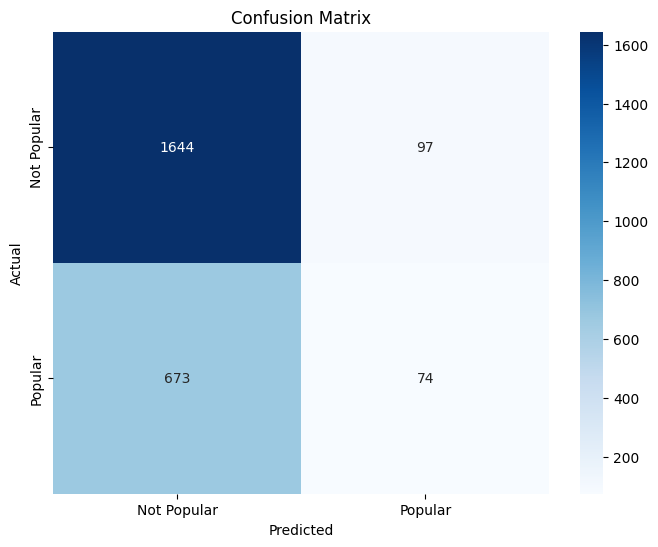

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X = df_clean.drop(columns=['popularity_class'])
y = df_clean['popularity_class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
df_clean['popularity_class'].value_counts()


,count
popularity_class,
Not Popular,6961
Popular,2988


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Features and target
X = df_clean.drop(columns=['popularity_class'])
y = df_clean['popularity_class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# Models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Evaluation
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': round(accuracy * 100, 2),
        'Precision': round(precision * 100, 2),
        'Recall': round(recall * 100, 2),
        'F1-Score': round(f1 * 100, 2)
    })

# Display comparison
results_df = pd.DataFrame(results)
print(results_df)


                       Model  Accuracy  Precision  Recall  F1-Score
0        Logistic Regression     69.48      60.34   69.48     58.15
1              Random Forest     69.76      64.68   69.76     62.20
2  Support Vector Classifier     70.00      66.05   70.00     59.03
3          Gradient Boosting     69.88      64.89   69.88     58.76


              precision    recall  f1-score   support

 Not Popular       0.70      0.99      0.82      1745
     Popular       0.38      0.02      0.03       755

    accuracy                           0.69      2500
   macro avg       0.54      0.50      0.43      2500
weighted avg       0.60      0.69      0.58      2500

Accuracy: 0.6948


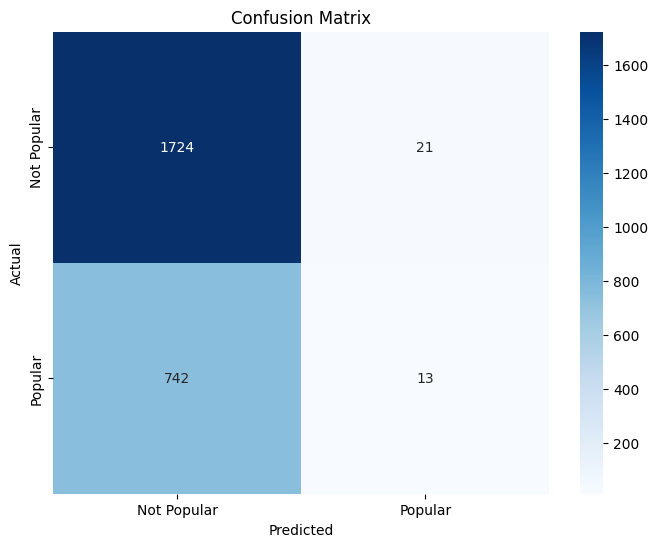

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from sklearn.svm import SVC

X = df_clean.drop(columns=['popularity_class'])
y = df_clean['popularity_class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
